# CHURN MODELLING USING ARTIFICIAL NUERAL NETWORKS (DEEP LEARNING MODEL)

## 1) Importing the necessary libraries

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop

In [18]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.shape

(10000, 14)

In [20]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True) #Removing unwanted features

In [21]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data.shape

(10000, 11)

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

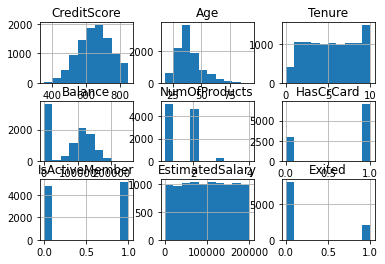

In [23]:
data.hist() #Plotting histogram of each features

#Credit Score Column is almost normally distributed
# Age Column is left skewed
#Estimated Salary is uniform distribution

In [24]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## 2)Converting categorical data into numerical data

In [25]:
data['Gender'] = pd.get_dummies(data['Gender'],drop_first=True)

In [26]:
data[['France','Germany','Spain']] = pd.get_dummies(data['Geography'])

In [27]:
data.drop(columns='Geography',inplace=True)

In [28]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


# CASE 1: WITHOUT STANDARDIZING THE DATA

In [29]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## 3) Extracting into features and label sets

In [30]:
X = data.drop(columns='Exited')
Y = data['Exited']

X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [31]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 4) Splitting the data into training and testing data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)



## 5) Building a sequential dense nueral network for predicting the labels

In [34]:
model = Sequential()

model.add(Dense(256,input_dim = 12, activation='relu')) # 1st layer contains 256 nuerons with input as 12 features
model.add(BatchNormalization())

model.add(Dense(128,activation='relu')) #2 layer contains 128 nuerons
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))  #2 layer contains 64 nuerons
model.add(BatchNormalization())

model.add(Dense(32,activation='relu'))  #2 layer contains 32 nuerons
model.add(BatchNormalization())

model.add(Dense(16,activation='relu'))  #2 layer contains 16 nuerons
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))  #Output layer with sigmoid as activation function

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  #Compiling the model with optimizer as adam

In [35]:
#Fitting the model with the training data and validation with testing data
# Setting epochs = 100
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.7261 - val_loss: 0.5352 - val_accuracy: 0.7875
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7981 - val_loss: 0.5169 - val_accuracy: 0.7850
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7981 - val_loss: 0.5098 - val_accuracy: 0.7890
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7981 - val_loss: 0.5085 - val_accuracy: 0.7890
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7981 - val_loss: 0.5083 - val_accuracy: 0.7890
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7981 - val_loss: 0.5150 - val_accuracy: 0.7890
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7981 - val_loss: 0.5106 - val_accuracy: 0.7890

Epoch 58/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4949 - accuracy: 0.7981 - val_loss: 0.5098 - val_accuracy: 0.7890
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7981 - val_loss: 0.5085 - val_accuracy: 0.7890
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7981 - val_loss: 0.5099 - val_accuracy: 0.7890
Epoch 61/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7981 - val_loss: 0.5090 - val_accuracy: 0.7890
Epoch 62/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.7981 - val_loss: 0.5073 - val_accuracy: 0.7890
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7981 - val_loss: 0.5206 - val_accuracy: 0.7890
Epoch 64/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4943 - accuracy: 0.7981 - val_loss: 0.5100 - val_accuracy:

In [36]:
#Checking the model accuracy

_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.798, Test: 0.789


## From this we see that model is close to good fit model which fits quite well with both training and testing data. But its performance should be improved more for better results

# CASE 2: STANDARDIZING THE DATA AND THEN BUILDING DEEP NUERAL NETWORK

In [37]:
# Standardizing the creditscore, balance, estimatedsalary columns as they are not normalized

sc = StandardScaler()
data[['CreditScore','Balance','EstimatedSalary']] = sc.fit_transform(data[['CreditScore','Balance','EstimatedSalary']])

In [38]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326221,0,42,2,-1.225848,1,1,1,0.021886,1,1,0,0
1,-0.440036,0,41,1,0.117350,1,0,1,0.216534,0,0,0,1
2,-1.536794,0,42,8,1.333053,3,1,0,0.240687,1,1,0,0
3,0.501521,0,39,1,-1.225848,2,0,0,-0.108918,0,1,0,0
4,2.063884,0,43,2,0.785728,1,1,1,-0.365276,0,0,0,1


## 3) Extracting into features and label sets

In [39]:
X = data.drop(columns='Exited')
Y = data['Exited']

X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,-0.326221,0,42,2,-1.225848,1,1,1,0.021886,1,0,0
1,-0.440036,0,41,1,0.117350,1,0,1,0.216534,0,0,1
2,-1.536794,0,42,8,1.333053,3,1,0,0.240687,1,0,0
3,0.501521,0,39,1,-1.225848,2,0,0,-0.108918,1,0,0
4,2.063884,0,43,2,0.785728,1,1,1,-0.365276,0,0,1


In [40]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 4) Splitting the data into training and testing data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)



## 5) Building a sequential dense nueral network for predicting the labels

In [42]:
model = Sequential()

model.add(Dense(256,input_dim = 12, activation='relu')) # 1st layer contains 256 nuerons with input as 12 features
model.add(BatchNormalization())

model.add(Dense(128,activation='relu')) #2nd layer contains 128 nuerons
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))  #3rd layer contains 64 nuerons
model.add(BatchNormalization())

model.add(Dense(32,activation='relu'))  #4th layer contains 32 nuerons
model.add(BatchNormalization())

model.add(Dense(16,activation='relu'))  #5th layer contains 16 nuerons
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))  #Output layer with sigmoid as activation function

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  #Compiling the model with optimizer as adam

In [43]:
#Fitting the model with the training data and validation with testing data

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5372 - accuracy: 0.7545 - val_loss: 0.4736 - val_accuracy: 0.7975
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8235 - val_loss: 0.5500 - val_accuracy: 0.7490
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8403 - val_loss: 0.4868 - val_accuracy: 0.7985
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8460 - val_loss: 0.4119 - val_accuracy: 0.8240
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8516 - val_loss: 0.4121 - val_accuracy: 0.8235
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8482 - val_loss: 0.3816 - val_accuracy: 0.8430
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8484 - val_loss: 0.3786 - val_accuracy: 0.8450

250/250 [==============================] - 0s 1ms/step - loss: 0.3100 - accuracy: 0.8686 - val_loss: 0.3884 - val_accuracy: 0.8395
Epoch 58/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8700 - val_loss: 0.3861 - val_accuracy: 0.8440
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8686 - val_loss: 0.3843 - val_accuracy: 0.8460
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.8702 - val_loss: 0.3814 - val_accuracy: 0.8435
Epoch 61/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8694 - val_loss: 0.3658 - val_accuracy: 0.8505
Epoch 62/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8715 - val_loss: 0.3856 - val_accuracy: 0.8485
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8715 - val_loss: 0.3703 - val_accuracy: 0.8500
Epoch

In [44]:
#Checking the model accuracy

_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.896, Test: 0.832


## We see that after standardizing our data, we get a very good fit model which is much better than our previous model. Thus, from this we conclude that for this given data it is better to standardize the data before building the nueral network instead of relying only on the batch normalization

# Checking the performance by decreasing the number of layers

In [45]:
model = Sequential()
model.add(Dense(256,input_dim = 12, activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=1)

Epoch 1/100
250/250 [==============================] - 0s 941us/step - loss: 0.4984 - accuracy: 0.7891 - val_loss: 0.4686 - val_accuracy: 0.7925
Epoch 2/100
250/250 [==============================] - 0s 600us/step - loss: 0.4622 - accuracy: 0.7999 - val_loss: 0.5453 - val_accuracy: 0.7275
Epoch 3/100
250/250 [==============================] - 0s 575us/step - loss: 0.4521 - accuracy: 0.8066 - val_loss: 0.4593 - val_accuracy: 0.7965
Epoch 4/100
250/250 [==============================] - 0s 572us/step - loss: 0.4523 - accuracy: 0.8035 - val_loss: 0.4647 - val_accuracy: 0.8010
Epoch 5/100
250/250 [==============================] - 0s 580us/step - loss: 0.4399 - accuracy: 0.8101 - val_loss: 0.4535 - val_accuracy: 0.7970
Epoch 6/100
250/250 [==============================] - 0s 577us/step - loss: 0.4383 - accuracy: 0.8112 - val_loss: 0.4463 - val_accuracy: 0.7980
Epoch 7/100
250/250 [==============================] - 0s 581us/step - loss: 0.4468 - accuracy: 0.8052 - val_loss: 0.4579 - val_ac

250/250 [==============================] - 0s 580us/step - loss: 0.3175 - accuracy: 0.8681 - val_loss: 0.3686 - val_accuracy: 0.8435
Epoch 58/100
250/250 [==============================] - 0s 574us/step - loss: 0.3167 - accuracy: 0.8683 - val_loss: 0.3686 - val_accuracy: 0.8465
Epoch 59/100
250/250 [==============================] - 0s 574us/step - loss: 0.3170 - accuracy: 0.8702 - val_loss: 0.3819 - val_accuracy: 0.8415
Epoch 60/100
250/250 [==============================] - 0s 583us/step - loss: 0.3177 - accuracy: 0.8664 - val_loss: 0.3686 - val_accuracy: 0.8450
Epoch 61/100
250/250 [==============================] - 0s 578us/step - loss: 0.3163 - accuracy: 0.8681 - val_loss: 0.3757 - val_accuracy: 0.8430
Epoch 62/100
250/250 [==============================] - 0s 577us/step - loss: 0.3164 - accuracy: 0.8692 - val_loss: 0.3687 - val_accuracy: 0.8480
Epoch 63/100
250/250 [==============================] - 0s 572us/step - loss: 0.3122 - accuracy: 0.8687 - val_loss: 0.3792 - val_accuracy

In [47]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.885, Test: 0.845


## Here we see that as we decreased our number of layers for the data, the training accuracy has decreased a little, while the testing accuracy has improved a little bit. Comparing with the above model, this model is better as it has lower chance of overfitting in this case

## Changing the Optimizer in the nueral network (SGD)

In [48]:
model = Sequential()
model.add(Dense(256,input_dim = 12, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Using Stochastic Gradient Descent as optimizer instead of adam
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

D:\Yeshwanth\Anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [50]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=0)

In [51]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.802, Test: 0.800


## We see that using SGD over Adam has decreased the performance for both training and testing datasets. So ADAM is preffered over SGD for this data.

## Changing the optimizer (RMSProp)

In [52]:
model = Sequential()
model.add(Dense(256,input_dim = 12, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Using RMSProp as the optimizer
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [53]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=0)

In [54]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.892, Test: 0.855


## We see that by using RMSProp over ADAM, both the training and testing performance has improved much better. Thus for this data, RMSProp is better than ADAM as optimizer.

## Using Dropout to remove unnecessary parameters in subsequent layers

In [55]:
model = Sequential()
model.add(Dense(256,input_dim = 12, activation='relu'))  #Using dropout to remove unnecessary parameters (weights and biases)
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [56]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, verbose=0)

In [57]:
_, train_acc = model.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.855, Test: 0.837


## We observe that using Dropout for this model has not given better results than the previous ones. So for this model, Dropout is not necessary.

# SUMMARY

## From the above, we observe that:

## 1) It is better to standardize the data before building the nueral model, instead of relying completely on Batch Normaliztion.

## 2) RMSProp as optimizer showed better results than ADAM and SGD.

## 3) There was no need of Dropout in the model

## 4) The model was a good fit model with very good performance around 89% for training and 85% for testing which was neither overfitting nor underfitting




# CONCLUSION:

## The performance of a nueral model depends very much on the data we provide to it and it is better to evaluate for different models with different hyperparameters to come up with the best fit model instead of relying by evaluating of only one model